In [1]:
import pandas as pd
import numpy as np

# Series

Series is a collection of data that has particular position.

In [2]:
a = pd.Series([1, 2, 3, 4, 5])
a

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
print(a.values)
print(a.index)

[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


In [4]:
# Lets create a series of marks of dofferent students
marks = pd.Series([9, 8, 9, 7, 5], index=['Clarke', 'John', 'Mathew', 
                                          'Lily', 'Rose'])
marks

Clarke    9
John      8
Mathew    9
Lily      7
Rose      5
dtype: int64

In [5]:
marks['Lily']

7

Series acts like a dictionary

In [6]:
# Conditions on series
marks[marks > 7]

Clarke    9
John      8
Mathew    9
dtype: int64

In [7]:
# Converting a series into dictionary
dictt = marks.to_dict()
dictt

{'Clarke': 9, 'John': 8, 'Lily': 7, 'Mathew': 9, 'Rose': 5}

In [8]:
# Converting a dictionary into Series
dictt = pd.Series(dictt)
dictt

Clarke    9
John      8
Mathew    9
Lily      7
Rose      5
dtype: int64

In [9]:
# Finding Nan value
marks_2 = pd.Series([9, 8, 9, 7, 5, np.nan], index=['Clarke', 'John', 'Mathew', 
                                          'Lily', 'Rose', 'James'])
pd.isna(marks_2)

Clarke    False
John      False
Mathew    False
Lily      False
Rose      False
James      True
dtype: bool

In [10]:
marks_2[marks_2.isna() == True]

James   NaN
dtype: float64

In [11]:
# We can label index
marks.index.name = "Name"
marks

Name
Clarke    9
John      8
Mathew    9
Lily      7
Rose      5
dtype: int64

# DataFrame

In [12]:
df = pd.DataFrame({'Marks': [12, 34, 56 ,13],
                  'Total Mark': [70, 70, 70, 70]},
                  index=['George', 'Hanna', 'Lissy', 'John'])
df

,Marks,Total Mark
George,12,70
Hanna,34,70
Lissy,56,70
John,13,70


In [13]:
# To get the column names
df.columns

Index(['Marks', 'Total Mark'], dtype='object')

In [14]:
# To get the element in a particula row and column
df['Marks']

George    12
Hanna     34
Lissy     56
John      13
Name: Marks, dtype: int64

In [15]:
df.loc['John', 'Marks']

13

In [16]:
df.iloc[2, 1]

70

In [17]:
# Head
df.head(2)

,Marks,Total Mark
George,12,70
Hanna,34,70


In [18]:
# Tail
df.tail(2)

,Marks,Total Mark
Lissy,56,70
John,13,70


In [19]:
# This is how we access elements of only some particular columns
df[['Marks', 'Total Mark']]

,Marks,Total Mark
George,12,70
Hanna,34,70
Lissy,56,70
John,13,70


In [20]:
# Adding a column
df['Student ID'] = np.arange(4)
df

,Marks,Total Mark,Student ID
George,12,70,0
Hanna,34,70,1
Lissy,56,70,2
John,13,70,3


In [21]:
# To find indices and replace
indices = df[df['Marks'] < 15]['Marks'].index
df.loc[indices, 'Marks'] = 'Failed'
df

,Marks,Total Mark,Student ID
George,Failed,70,0
Hanna,34,70,1
Lissy,56,70,2
John,Failed,70,3


# Reindexing

In [22]:
# Reindexing can be used to reindex values
ser = pd.Series(['Neem', 'Banian', 'Bamboo'], index=[0, 5, 10])
ser

0       Neem
5     Banian
10    Bamboo
dtype: object

In [23]:
ser = ser.reindex(range(15), method='ffill')
ser

0       Neem
1       Neem
2       Neem
3       Neem
4       Neem
5     Banian
6     Banian
7     Banian
8     Banian
9     Banian
10    Bamboo
11    Bamboo
12    Bamboo
13    Bamboo
14    Bamboo
dtype: object

In [24]:
# Using reindex to create index
df = pd.DataFrame(np.random.randn(25).reshape(5, 5), 
                  index=['A', 'B', 'C', 'D', 'E'], 
                  columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df

,col1,col2,col3,col4,col5
A,0.021384,-0.024308,1.198022,-1.916806,-0.244474
B,0.380885,2.372523,-0.994825,0.271113,0.809122
C,1.497605,-0.546738,0.018805,1.592502,-0.324294
D,-1.120581,0.359149,0.258692,1.238302,-0.619531
E,-0.974558,0.706108,-0.671427,0.090273,-0.810843


In [25]:
df = df.reindex(['A', 'B', 'C', 'D', 'E', 'F'])
df      # this is how we create an additional index

,col1,col2,col3,col4,col5
A,0.021384,-0.024308,1.198022,-1.916806,-0.244474
B,0.380885,2.372523,-0.994825,0.271113,0.809122
C,1.497605,-0.546738,0.018805,1.592502,-0.324294
D,-1.120581,0.359149,0.258692,1.238302,-0.619531
E,-0.974558,0.706108,-0.671427,0.090273,-0.810843
F,NaN,NaN,NaN,NaN,NaN


# Droping Values

In [26]:
ser = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
ser

a    1
b    2
c    3
d    4
dtype: int64

In [27]:
# This is how we will drop values in a particular array
ser.drop('a')

b    2
c    3
d    4
dtype: int64

In [28]:
ser

a    1
b    2
c    3
d    4
dtype: int64

In [29]:
# Dropping columns in DataFrame
df = pd.DataFrame(np.random.randn(25).reshape(5, 5), 
                  index=['A', 'B', 'C', 'D', 'E'], 
                  columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df

,col1,col2,col3,col4,col5
A,-0.997305,-1.053092,0.509525,-0.836985,-0.996390
B,2.191992,-0.701763,-0.903795,-0.284347,0.976579
C,-2.065797,0.499444,-1.129099,1.287114,0.992394
D,-0.186913,-0.895196,-0.095326,0.880349,0.662752
E,0.030440,-0.629143,-0.284755,1.261394,0.628227


In [30]:
df.drop('col1', axis=1)

,col2,col3,col4,col5
A,-1.053092,0.509525,-0.836985,-0.996390
B,-0.701763,-0.903795,-0.284347,0.976579
C,0.499444,-1.129099,1.287114,0.992394
D,-0.895196,-0.095326,0.880349,0.662752
E,-0.629143,-0.284755,1.261394,0.628227


# Selecting Entries

In [31]:
# We can select multiple rows of a Series by defining the multiple indices
ser[['a','b']]

a    1
b    2
dtype: int64

In [32]:
ser['a']

1

In [33]:
ser[ser > 3]

d    4
dtype: int64

In [34]:
ser[ser > 3] = 10
ser

a     1
b     2
c     3
d    10
dtype: int64

In [35]:
# With DataFrames for accessing columns
df[['col1', 'col2']]

,col1,col2
A,-0.997305,-1.053092
B,2.191992,-0.701763
C,-2.065797,0.499444
D,-0.186913,-0.895196
E,0.030440,-0.629143


In [36]:
df[['col1', 'col2']] = 3
df

,col1,col2,col3,col4,col5
A,3.0,3.0,0.509525,-0.836985,-0.996390
B,3.0,3.0,-0.903795,-0.284347,0.976579
C,3.0,3.0,-1.129099,1.287114,0.992394
D,3.0,3.0,-0.095326,0.880349,0.662752
E,3.0,3.0,-0.284755,1.261394,0.628227


In [37]:
df[df > 0]

,col1,col2,col3,col4,col5
A,3.0,3.0,0.509525,NaN,NaN
B,3.0,3.0,NaN,NaN,0.976579
C,3.0,3.0,NaN,1.287114,0.992394
D,3.0,3.0,NaN,0.880349,0.662752
E,3.0,3.0,NaN,1.261394,0.628227


# Rank and Sort

In [38]:
ser_2 = pd.Series(np.random.randn(10), index=range(10))
ser_2

0    0.758496
1   -1.267116
2   -0.308777
3   -0.262511
4    1.960871
5    0.434932
6   -0.837638
7    0.763463
8    1.319084
9    0.342013
dtype: float64

In [39]:
# Finding the rank
ser_2.rank()

0     7.0
1     1.0
2     3.0
3     4.0
4    10.0
5     6.0
6     2.0
7     8.0
8     9.0
9     5.0
dtype: float64

In [40]:
# Sorting
ser_2.sort_values()

1   -1.267116
6   -0.837638
2   -0.308777
3   -0.262511
9    0.342013
5    0.434932
0    0.758496
7    0.763463
8    1.319084
4    1.960871
dtype: float64

# Youtube Videos in Colab for Statuistics

In [41]:
from IPython.display import YouTubeVideo

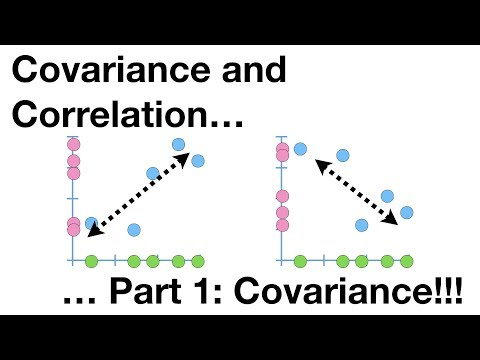

In [42]:
YouTubeVideo('qtaqvPAeEJY')

# Missing values in DatFrame and Series

In [43]:
series = pd.Series([1, 2, 4, 5, np.nan])
df = pd.DataFrame([[1, 2, 3], [34, np.nan, 89], [np.nan, np.nan, np.nan]])

In [44]:
series

0    1.0
1    2.0
2    4.0
3    5.0
4    NaN
dtype: float64

In [45]:
# Dropping the missing values using the pandas inbuilt method
series.dropna()

0    1.0
1    2.0
2    4.0
3    5.0
dtype: float64

In [46]:
df

,0,1,2
0,1.0,2.0,3.0
1,34.0,NaN,89.0
2,NaN,NaN,NaN


In [47]:
# Dropping the missing values using inbuilt method
df.dropna()

,0,1,2
0,1.0,2.0,3.0


In [48]:
# Choosing the dropping method
df.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,34.0,NaN,89.0


In [49]:
# Defining a threshold of number of datapoints which is not nan
df.dropna(thresh=2)

,0,1,2
0,1.0,2.0,3.0
1,34.0,NaN,89.0


Filling the missing values

In [50]:
df

,0,1,2
0,1.0,2.0,3.0
1,34.0,NaN,89.0
2,NaN,NaN,NaN


In [51]:
# Filling with a unique value
df.fillna(0)

,0,1,2
0,1.0,2.0,3.0
1,34.0,0.0,89.0
2,0.0,0.0,0.0


In [52]:
# Filling with different values
df.fillna({0: 0, 1: 1, 2: 2})   # Use inplace to make this change permanant

,0,1,2
0,1.0,2.0,3.0
1,34.0,1.0,89.0
2,0.0,1.0,2.0


# Index Heirarchy

In [53]:
new_ser = pd.Series(np.random.randn(6), index=[[1, 1, 1, 2, 2, 2], ['a', 'b', 'c', 'a', 'b', 'c']])
new_ser

1  a   -0.773832
   b   -0.448991
   c    0.741846
2  a    0.302234
   b   -1.134448
   c    1.480368
dtype: float64

In [54]:
new_ser[1]['b']

-0.44899088417359656

In [55]:
new_ser[1]

a   -0.773832
b   -0.448991
c    0.741846
dtype: float64

In [59]:
new_ser[:, 'b']

1   -0.448991
2   -1.134448
dtype: float64

In [60]:
# Converting such serieses with index herirarchy as dataframes
df = new_ser.unstack()
df

,a,b,c
1,-0.773832,-0.448991,0.741846
2,0.302234,-1.134448,1.480368


In [62]:
# Naming columns and indexes
df.index.names = ['Index']
df.columns.names = ['column']
df

column,a,b,c
Index,,,
1,-0.773832,-0.448991,0.741846
2,0.302234,-1.134448,1.480368
